Netflix Data Analysis

The dataset was gotten from Kaggle and has information about TV shows & movies available on Netflix till 2021.

In [61]:
## Import Necessary Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [21]:
## Load Data from local drive

from google.colab import files
import io
uploaded = files.upload()

df = pd.read_csv(io.StringIO(uploaded['Netflix Dataset.csv'].decode('utf-8')))


Saving Netflix Dataset.csv to Netflix Dataset (1).csv


In [15]:
df.head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
df.shape

(7789, 11)

In [ ]:
df.columns

Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [37]:
df.describe()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
count,7789,7789,7789,5401,7071,7282,7779,7782,7789,7789,7789
unique,7787,2,7787,4050,6831,681,1565,14,216,492,7769
top,s6621,Movie,The Lost Okoroshi,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,2,5379,2,18,18,2556,118,2865,1608,334,3


In [ ]:
## Check for Null Values

df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

Q1.  Find the show ID & director of 'The Matrix'

In [38]:
df.Title.value_counts()

The Lost Okoroshi                          2
Backfire                                   2
3%                                         1
Revolt                                     1
Ricardo Quevedo: Hay gente así             1
                                          ..
Handsome Devil                             1
Hamza's Suitcase                           1
Hamid                                      1
Hamburger Hill                             1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    1
Name: Title, Length: 7787, dtype: int64

In [41]:
df[df['Title'].str.contains('The Matrix')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6650,s6649,Movie,The Matrix,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,"November 1, 2019",R,136 min,"Action & Adventure, Sci-Fi & Fantasy",A computer hacker learns that what most people...
6651,s6650,Movie,The Matrix Reloaded,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,"November 1, 2019",R,138 min,"Action & Adventure, Sci-Fi & Fantasy","The crew must protect Zion, the last outpost s..."
6652,s6651,Movie,The Matrix Revolutions,"Lilly Wachowski, Lana Wachowski","Keanu Reeves, Laurence Fishburne, Carrie-Anne ...",United States,"November 1, 2019",R,129 min,"Action & Adventure, Sci-Fi & Fantasy",The final installment in the Matrix trilogy fi...


Q2.  Which year was the highest number of TV Shows & Movies released?

In [44]:
### Convert Release_Date to datetime

df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [45]:
df.dtypes

Show_Id                 object
Category                object
Title                   object
Director                object
Cast                    object
Country                 object
Release_Date    datetime64[ns]
Rating                  object
Duration                object
Type                    object
Description             object
dtype: object

In [46]:
### Yearly value counts

df['Release_Date'].dt.year.value_counts()  ###2019

2019.0    2154
2020.0    2010
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Release_Date, dtype: int64

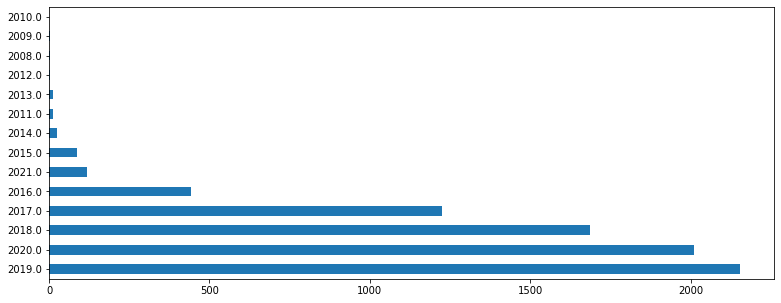

In [50]:
### Plot bar chat


df['Release_Date'].dt.year.value_counts().plot(kind='barh', figsize=(13,5))

Q3.  What is the total Movies & TV shows released?

In [56]:
df.groupby('Category').Category.count()

Category
Movie      5379
TV Show    2410
Name: Category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


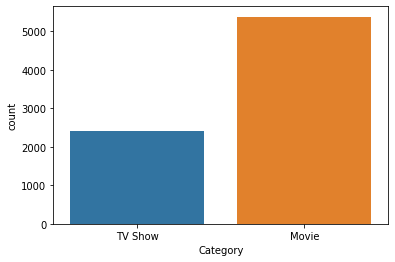

In [60]:
sns.countplot(df['Category'])
plt.show()

Q4.  Show movies released in 2018

In [70]:

df[(df.Category=='Movie') & (df.Release_Date.dt.year==2018)] #['Title']


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
17,s18,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",2018-10-10,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
19,s20,Movie,'89,NaN,"Lee Dixon, Ian Wright, Paul Merson",United Kingdom,2018-05-16,TV-PG,87 min,Sports Movies,"Mixing old footage with interviews, this is th..."
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,2018-09-01,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,2018-09-15,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug..."
...,...,...,...,...,...,...,...,...,...,...,...
7765,s7764,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,2018-02-15,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...
7770,s7769,Movie,Zindagi Kitni Haseen Hay,Anjum Shahzad,"Feroze Khan, Sajal Ali, Jibrayl Ahmed Rajput, ...",Pakistan,2018-10-01,TV-14,126 min,"Dramas, International Movies, Romantic Movies",Two young parents struggle to keep their marri...
7773,s7772,Movie,Zion,Floyd Russ,Zion Clark,United States,2018-08-10,TV-PG,12 min,"Documentaries, Sports Movies",Born without legs and stuck in foster care for...
7778,s7777,Movie,Zokkomon,Satyajit Bhatkal,"Darsheel Safary, Anupam Kher, Manjari Fadnis, ...",India,2018-11-01,PG,104 min,"Children & Family Movies, Dramas","When his cruel uncle abandons him, a young orp..."


Q5. Top 10 Directors with highest TV shows & Movies?

In [72]:
df.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [74]:
df.Director.value_counts().head(10)

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Youssef Chahine           12
Martin Scorsese           12
Steven Spielberg          10
David Dhawan               9
Robert Rodriguez           8
Name: Director, dtype: int64

Q6. How many Movies or TV shows was Will Smith casted?

In [82]:
## Create new DataFrame df1 & Drop Null Values 

df1 = df.dropna()

In [88]:
df1[df1.Cast.str.contains('Will Smith')]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
687,s688,Movie,Bad Boys,Michael Bay,"Will Smith, Martin Lawrence, Téa Leoni, Tchéky...",United States,2019-10-01,R,119 min,"Action & Adventure, Comedies","In this fast-paced actioner, two Miami narcoti..."
688,s689,Movie,Bad Boys II,Michael Bay,"Will Smith, Martin Lawrence, Jordi Mollà, Gabr...",United States,2019-10-01,R,147 min,"Action & Adventure, Comedies","In this hyperkinetic sequel, a pair of Miami n..."
1102,s1103,Movie,Bright,David Ayer,"Will Smith, Joel Edgerton, Noomi Rapace, Lucy ...",United States,2017-12-22,TV-MA,118 min,"Action & Adventure, Sci-Fi & Fantasy","In an LA rife with interspecies tensions, a hu..."
2756,s2757,Movie,Hitch,Andy Tennant,"Will Smith, Eva Mendes, Kevin James, Amber Val...",United States,2020-01-01,PG-13,118 min,"Comedies, Romantic Movies",Smooth and sexy Hitch helps clients make a gre...
4031,s4032,Movie,Men in Black,Barry Sonnenfeld,"Tommy Lee Jones, Will Smith, Linda Fiorentino,...",United States,2019-10-19,PG-13,98 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy",A streetwise cop teams with a veteran governme...
4032,s4033,Movie,Men in Black II,Barry Sonnenfeld,"Tommy Lee Jones, Will Smith, Rip Torn, Lara Fl...",United States,2019-10-01,PG-13,88 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy",Will Smith and Tommy Lee Jones reprise their r...
5516,s5516,Movie,Seven Pounds,Gabriele Muccino,"Will Smith, Rosario Dawson, Woody Harrelson, M...",United States,2018-12-01,PG-13,123 min,"Dramas, Romantic Movies","Weighed down by a dark secret, IRS agent Ben T..."
6792,s6791,Movie,The Pursuit of Happyness,Gabriele Muccino,"Will Smith, Jaden Smith, Thandie Newton, Brian...",United States,2019-10-01,PG-13,117 min,Dramas,"When Chris and his son are evicted, they face ..."
7625,s7624,Movie,Wild Wild West,Barry Sonnenfeld,"Will Smith, Kevin Kline, Kenneth Branagh, Salm...",United States,2020-01-01,PG-13,106 min,"Action & Adventure, Comedies, Sci-Fi & Fantasy","Armed with an ingenious arsenal, two top-notch..."


Q7.  Top 10 countries with highest numbers of Movies 

In [93]:
df1.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


In [107]:
df2 = df1[df1.Category=='Movie']

In [109]:
df2.Country.value_counts().head(10)

United States     1628
India              827
United Kingdom     155
Canada             101
Egypt               87
Spain               76
Turkey              71
Philippines         70
Indonesia           67
Japan               66
Name: Country, dtype: int64